## HW2 李梦飞

In [1]:
# 加载所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

### 第一题

In [2]:
def initialize():
    #初始化参数
    state = 2
    clock = 0
    return state,clock

In [3]:
def event(clock,state):
    #产生下一个事件的时间
    if state == 2:
        next_repair = clock + 2e10
        next_failure = clock + np.random.exponential(3.5)
    elif state == 1:
        next_repair = clock + np.random.exponential(2.5)
        next_failure = clock + np.random.exponential(3.5)
    else:
        warnings.warn('state异常')
        next_repair = clock + 2e10
        next_failure = clock + 2e10
    return next_repair,next_failure

In [4]:
def routine(state,next_repair,next_failure):
    #更新状态与时间
    next_event = min(next_repair,next_failure)
    if next_repair == next_event:
        state += 1
    elif next_failure == next_event:
        state -= 1
    clock = next_event
    return state,clock

In [5]:
def over(state):
    #判断终止条件
    if state == 0:
        return True
    else:
        return False

In [7]:
def simulate():
    #一次仿真
    state,clock = initialize()
    while not over(state):
        next_repair,next_failure = event(clock,state)
        state,clock = routine(state,next_repair,next_failure)
    return clock

In [8]:
if __name__ == '__main__':
    #1000次仿真
    np.random.seed(1)
    result = list()
    for i in range(1000):
        result.append(simulate())
    result = np.array(result)

(array([452., 257., 162.,  65.,  33.,  16.,   5.,   5.,   4.,   1.]),
 array([ 0.10659795,  7.5464696 , 14.98634126, 22.42621291, 29.86608456,
        37.30595621, 44.74582787, 52.18569952, 59.62557117, 67.06544282,
        74.50531448]),
 <BarContainer object of 10 artists>)

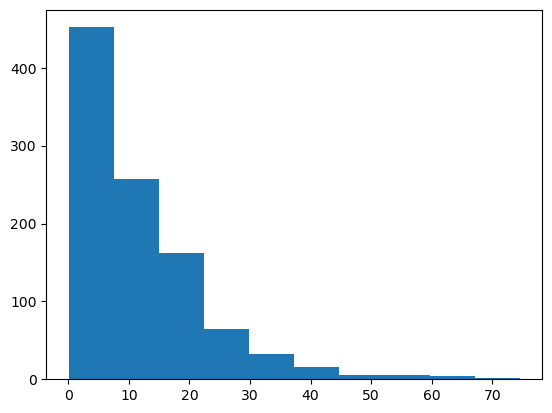

In [9]:
plt.hist(result)

In [10]:
#根据中心极限定理计算置信区间
mean = np.mean(result)
std = np.std(result)
print('均值',mean,'置信区间',mean-1.96*std/(1000**0.5),'~',mean+1.96*std/(1000**0.5))

均值 11.826628599297651 置信区间 11.170067366543083 ~ 12.483189832052219


In [11]:
#根据中心极限定理计算置信区间
p = sum(result<5)/1000
std = (p*(1-p))**0.5
print('均值',p,'置信区间',p-1.96*std/(1000**0.5),'~',p+1.96*std/(1000**0.5))

均值 0.292 置信区间 0.26381849866313006 ~ 0.3201815013368699


### 第二题

累计分布函数为
$x < 0$ : $F(x) = 1/2 * e^{2x}$
$x>=0 $ : $F(x) = 1 - 1/2 * e^{-2x}$

反函数为
$u < 1/2$ : $F^{-1}(u) = 1/2 * log(2u)$
$u >= 1/2$ : $F^{-1}(u) = -1/2 * log(2(1-u))$

In [12]:
def inverse_cdf(u):
    if u<1/2:
        x = 1/2 * np.log(2*u)
    else:
        x = -1/2 * np.log(2*(1-u))
    return x


In [13]:
np.random.seed(1)
u = np.random.uniform(size=1000)
x = list()
for i in u:
    x.append(inverse_cdf(i))

(array([  1.,   1.,   4.,  15.,  39., 133., 430., 267.,  76.,  28.,   6.]),
 array([-4.19144123, -3.57268041, -2.9539196 , -2.33515878, -1.71639797,
        -1.09763715, -0.47887634,  0.13988448,  0.75864529,  1.37740611,
         1.99616692,  2.61492774]),
 <BarContainer object of 11 artists>)

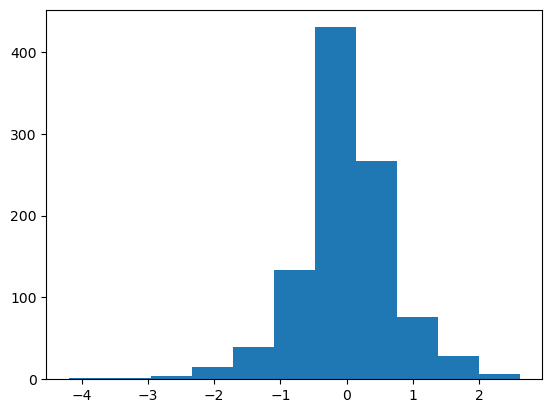

In [14]:
plt.hist(x,11)

### 第三题

In [15]:
tmin = 0
tmax = 5
tmode = 3

In [16]:
def triangular(x,tmin,tmax,tmode):
    high = 2/(tmax-tmin)
    if tmin < x <= tmode:
        y = (x-tmin)*high/(tmode-tmin)
    elif tmode < x < tmax:
        y = (tmax - x)*high/(tmax-tmode)
    else:
        y = 0
    return y

In [17]:
def random_triangular(tmin,tmax,tmode):
    while True:
        x = np.random.uniform(tmin,tmax)
        u = np.random.uniform()
        f = triangular(x,tmin,tmax,tmode)
        if u <= f/(2*(tmax-tmin)):
            return x
            break

(array([ 14.,  49.,  87., 106., 160., 162., 194., 111.,  84.,  33.]),
 array([0.05919998, 0.54347035, 1.02774072, 1.51201109, 1.99628146,
        2.48055184, 2.96482221, 3.44909258, 3.93336295, 4.41763332,
        4.90190369]),
 <BarContainer object of 10 artists>)

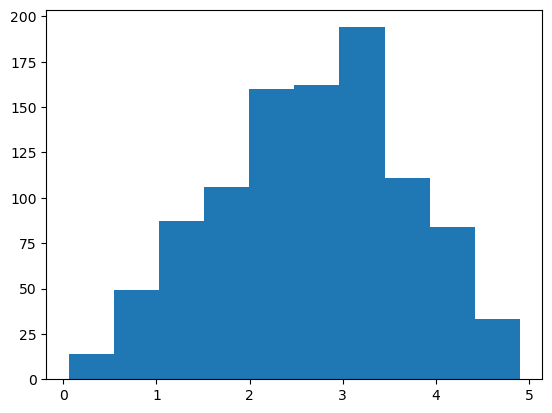

In [18]:
result = list()
for i in range(1000):
    result.append(random_triangular(tmin,tmax,tmode))
plt.hist(result)